## EDA: understand the data and describe it

### The ***velocity*** table


### Table of contents

- [Open and check the data](#step1)
  
- [Seasonal trends](#step2)

- [Conclusions](#step3)
   

#### Open and check the data<a name="step1"></a>

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import date 
import holidays 


#from fbprophet import Prophet

from warnings import simplefilter 
simplefilter(action='ignore', category=FutureWarning)

In [2]:
#read the data
velocity = pd.read_csv('velocity.csv')
velocity.head()

,time,velocity,final_velocity
0,2014-09-01 00:00:00,0.8883,0.8883
1,2014-09-01 00:05:00,0.8856,0.8856
2,2014-09-01 00:10:00,0.8379,0.8379
3,2014-09-01 00:15:00,0.8514,0.8514
4,2014-09-01 00:20:00,0.8487,0.8487


In [4]:
velocity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350784 entries, 0 to 350783
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   time            350784 non-null  object 
 1   velocity        350679 non-null  float64
 2   final_velocity  329984 non-null  float64
dtypes: float64(2), object(1)
memory usage: 8.0+ MB


In [5]:
#change to datetime
velocity['time'] = pd.to_datetime(velocity["time"])

In [6]:
#check if there are equal time intervals:
velocity.set_index('time').index.to_series().diff().astype('timedelta64[m]').value_counts()

5.0    350783
Name: time, dtype: int64

In [7]:
#check for duplicates:
velocity.duplicated().sum()

0

In [8]:
#part of the missing data within the columns
velocity.isna().sum()/len(velocity)

time              0.000000
velocity          0.000299
final_velocity    0.059296
dtype: float64

In [26]:
#its stay a question if we need to replace NA in those columns (or replace to 0 or to mean/median)
#i proceed the current models without replacing
#level['final_level'].fillna((level['final_level'].mean()), inplace=True)

In [9]:
#describe the values to see extreme values(outliers)
velocity.describe()

,velocity,final_velocity
count,350679.000000,329984.000000
mean,0.809007,0.829326
std,0.183932,0.165333
min,0.020700,0.140400
25%,0.674100,0.710100
50%,0.863100,0.877500
75%,0.953100,0.957600
max,1.325700,1.325700


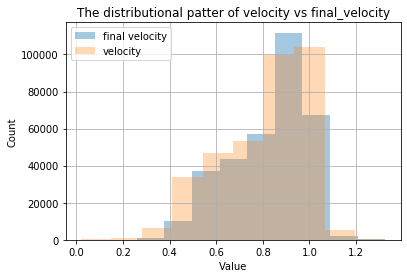

In [11]:
'''plot the values in order to understand distribution pattern'''

velocity.final_velocity.hist(alpha=0.4, label="final velocity")
velocity.velocity.hist(alpha=0.3, label="velocity")
plt.title("The distributional patter of velocity vs final_velocity")
plt.xlabel('Value')
plt.ylabel('Count')
plt.legend();

#so, the both values are highly correlated, and final velocity take more extreme values

In [12]:
velocity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350784 entries, 0 to 350783
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   time            350784 non-null  datetime64[ns]
 1   velocity        350679 non-null  float64       
 2   final_velocity  329984 non-null  float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 8.0 MB


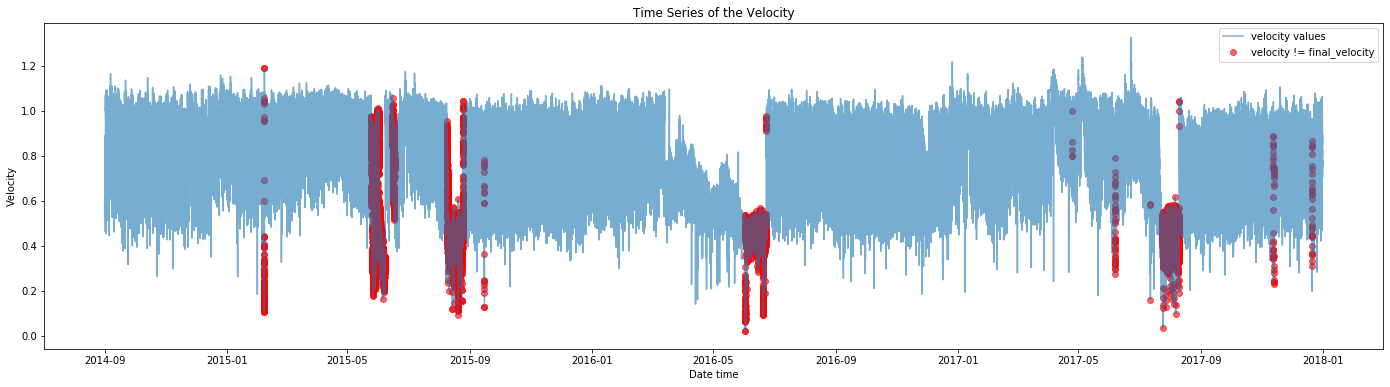

In [15]:
'''plot initial values with possible data loss or inconsistency'''
# velocity, total data


#pd.plotting.register_matplotlib_converters()  # needed to plot timestamps

plt.subplots(figsize=(24,6))

plt.plot(velocity.time, velocity.velocity, 
         alpha=0.6, 
         label="velocity values")

plt.scatter(x='time', y='velocity', data=velocity[velocity.velocity!=velocity.final_velocity], 
             marker="o",
            color='red', label="velocity != final_velocity", alpha=0.6)

plt.xlabel('Date time')
plt.ylabel('Velocity')
plt.title('Time Series of the Velocity');
plt.legend(loc="best")
plt.show()

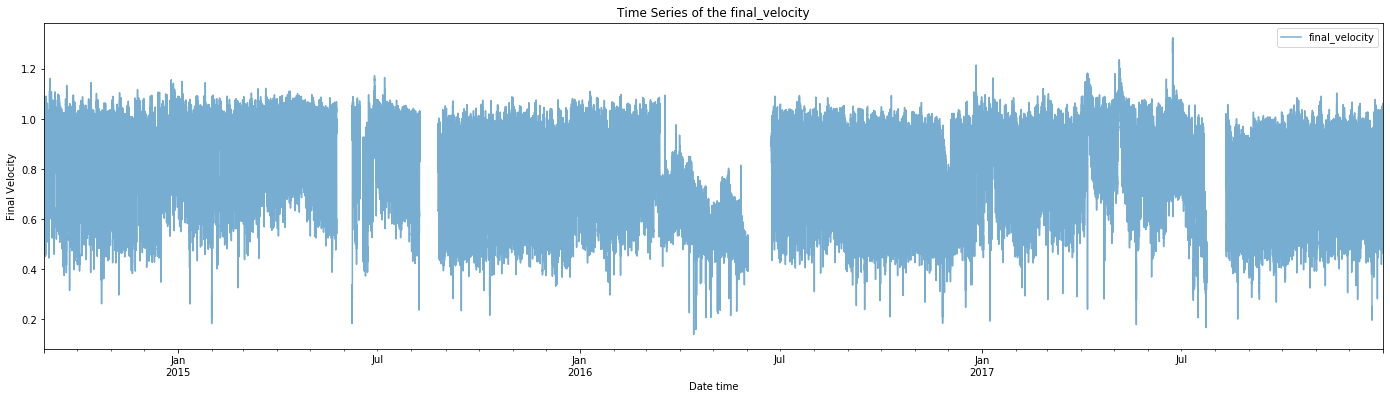

In [16]:
'''plot initial values'''
# final_velocity

velocity.plot(x='time', y='final_velocity', alpha=.6, figsize=(24,6))
plt.xlabel('Date time')
plt.ylabel('Final Velocity')
plt.title('Time Series of the final_velocity');

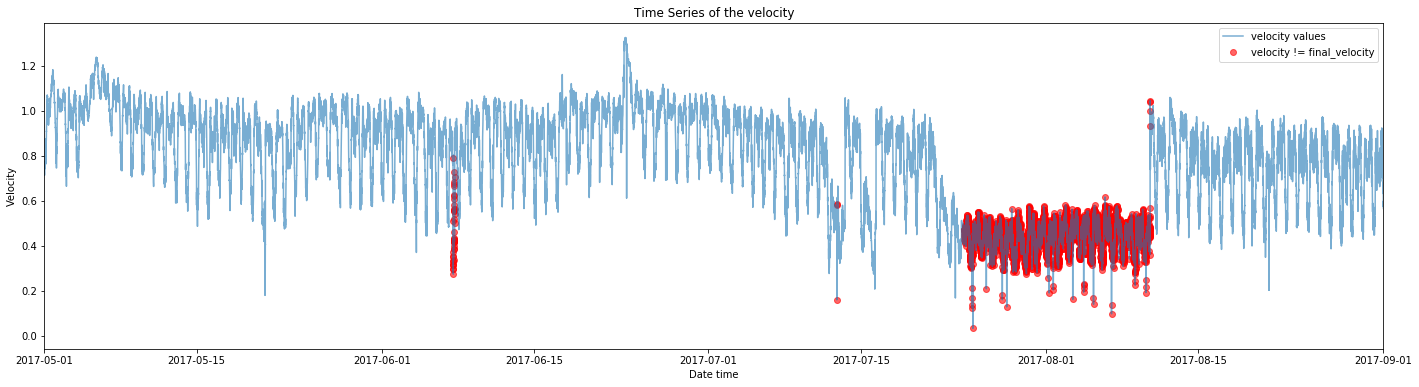

In [17]:
'''plot initial values with possible data loss or inconsistency'''
'''detailed view, 3 random months, where velocity!=final_velocity'''
# velocity


pd.plotting.register_matplotlib_converters()  # needed to plot timestamps

plt.subplots(figsize=(24,6))

plt.plot(velocity.time, velocity.velocity,  alpha=0.6, label="velocity values")

plt.scatter(x='time', y='velocity', data=velocity[velocity.velocity!=velocity.final_velocity], 
             marker="o", color='red', label="velocity != final_velocity", alpha=0.6)
plt.xlim('2017-05-01 00:00:00','2017-09-01 00:00:00')
plt.xlabel('Date time')
plt.ylabel('Velocity')
plt.title('Time Series of the velocity')
plt.legend(loc="best");

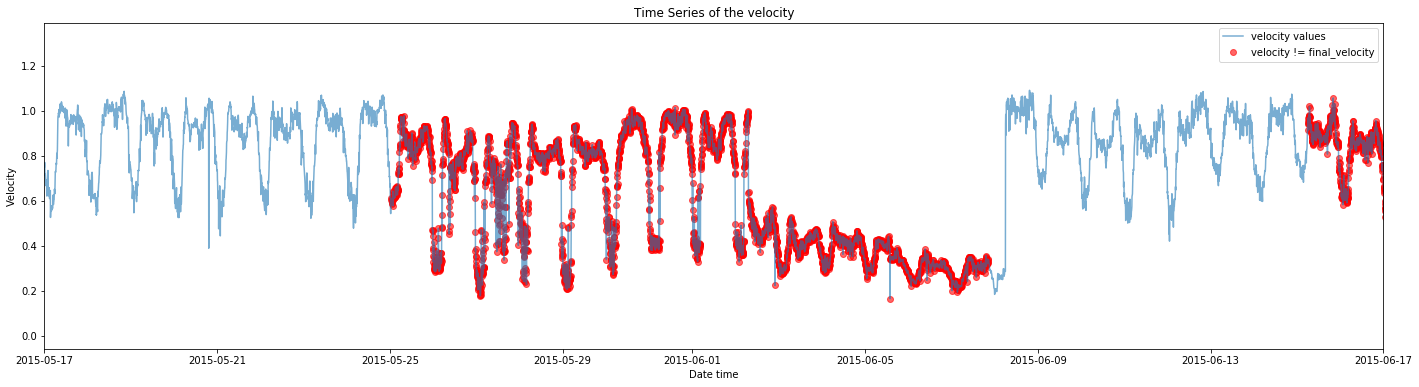

In [18]:
'''plot initial values with possible data loss or inconsistency'''
'''detailed view, 1 random month,  where velocity!=final_velocity'''
# velocity

pd.plotting.register_matplotlib_converters()  # needed to plot timestamps

plt.subplots(figsize=(24,6))

plt.plot(velocity.time, velocity.velocity,  alpha=0.6, label="velocity values")

plt.scatter(x='time', y='velocity', data=velocity[velocity.velocity!=velocity.final_velocity], 
             marker="o", color='red', label="velocity != final_velocity", alpha=0.6)
plt.xlim('2015-05-17 00:00:00','2015-06-17 00:00:00')
plt.xlabel('Date time')
plt.ylabel('Velocity')
plt.title('Time Series of the velocity')
plt.legend(loc="best");

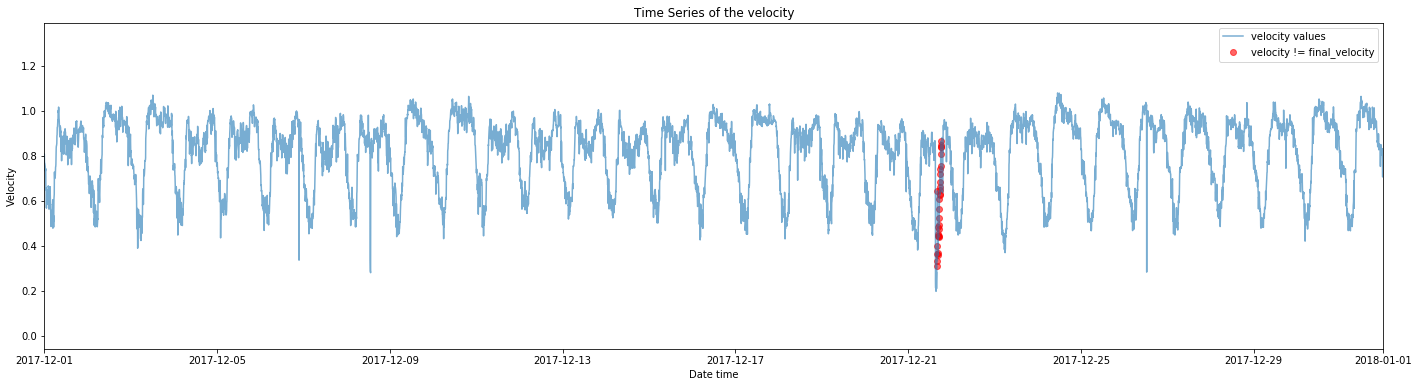

In [20]:
'''plot initial values with possible data loss or inconsistency'''
'''detailed view, 1 random month, where velocity!=final_velocity'''
# velocity

pd.plotting.register_matplotlib_converters()  # needed to plot timestamps
plt.subplots(figsize=(24,6))

plt.plot(velocity.time, velocity.velocity,  alpha=0.6, label="velocity values")

plt.scatter(x='time', y='velocity', data=velocity[velocity.velocity!=velocity.final_velocity], 
             marker="o", color='red', label="velocity != final_velocity", alpha=0.6)
plt.xlim('2017-12-01 00:00:00','2018-01-01 00:00:00')
plt.xlabel('Date time')
plt.ylabel('Velocity')
plt.title('Time Series of the velocity')
plt.legend(loc="best");


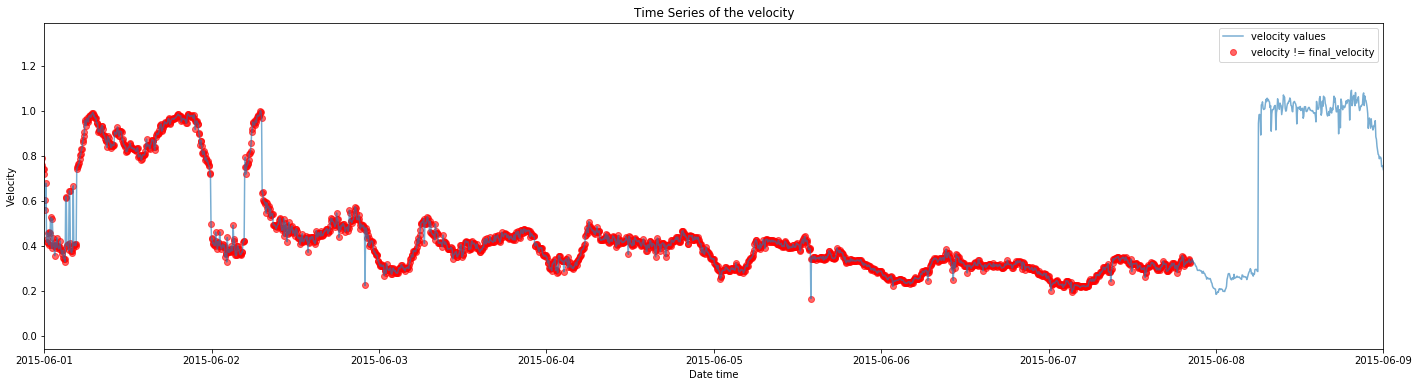

In [23]:
'''plot initial values with possible data loss or inconsistency'''
'''detailed view, 1 random week, where velocity!=final_velocity'''
# velocity


pd.plotting.register_matplotlib_converters()  # needed to plot timestamps
plt.subplots(figsize=(24,6))

plt.plot(velocity.time, velocity.velocity,  alpha=0.6, label="velocity values")

plt.scatter(x='time', y='velocity', data=velocity[velocity.velocity!=velocity.final_velocity], 
             marker="o", color='red', label="velocity != final_velocity", alpha=0.6)
plt.xlim('2015-06-01 00:00:00','2015-06-09 00:00:00')
plt.xlabel('Date time')
plt.ylabel('Velocity')
plt.title('Time Series of the velocity')
plt.legend(loc="best");


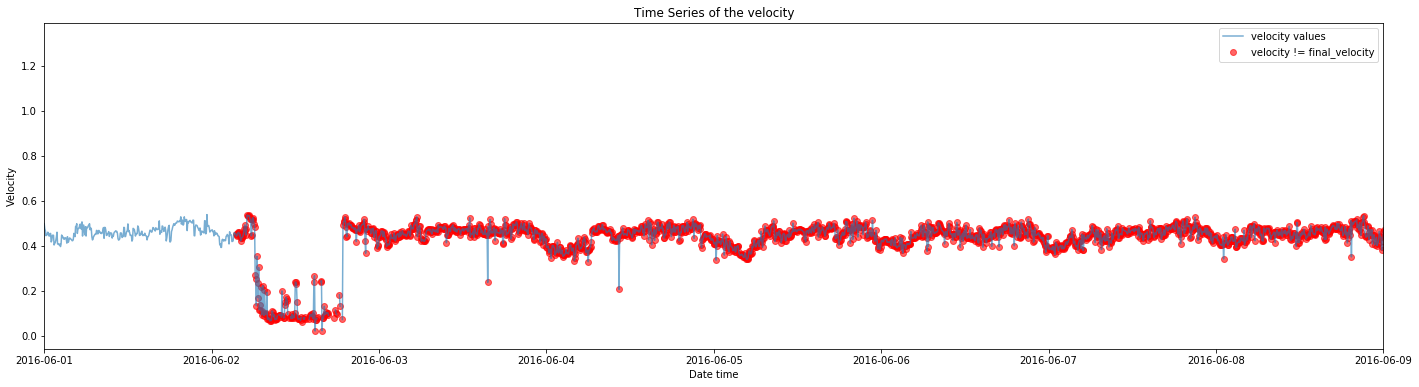

In [24]:
'''plot initial values with possible data loss or inconsistency'''
'''detailed view, 1 random week, where velocity!=final_velocity'''
# velocity


pd.plotting.register_matplotlib_converters()  # needed to plot timestamps
plt.subplots(figsize=(24,6))

plt.plot(velocity.time, velocity.velocity,  alpha=0.6, label="velocity values")

plt.scatter(x='time', y='velocity', data=velocity[velocity.velocity!=velocity.final_velocity], 
             marker="o", color='red', label="velocity != final_velocity", alpha=0.6)
plt.xlim('2016-06-01 00:00:00','2016-06-09 00:00:00')
plt.xlabel('Date time')
plt.ylabel('Velocity')
plt.title('Time Series of the velocity')
plt.legend(loc="best");

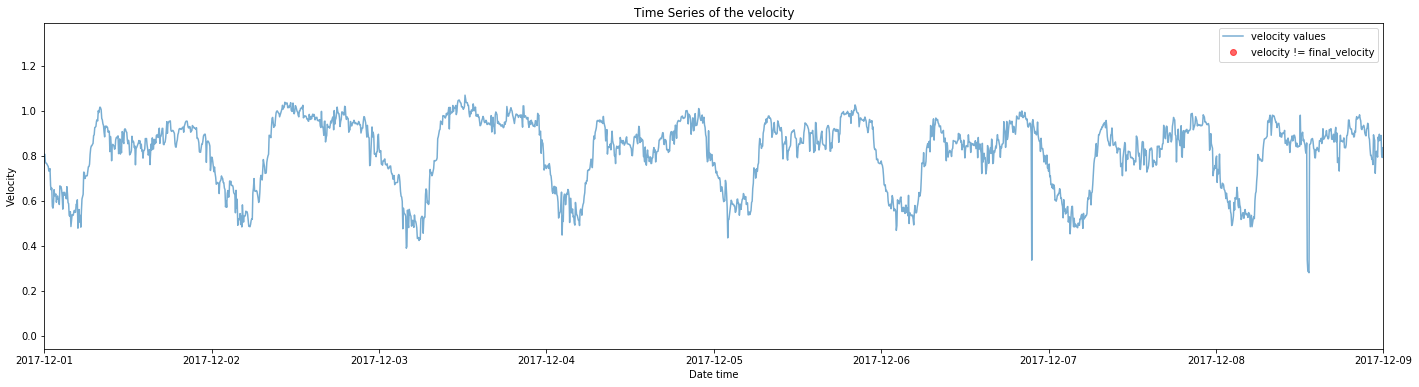

In [25]:
'''plot initial values with possible data loss or inconsistency'''
'''detailed view, 1 random week, where velocity!=final_velocity'''
# velocity


pd.plotting.register_matplotlib_converters()  # needed to plot timestamps
plt.subplots(figsize=(24,6))

plt.plot(velocity.time, velocity.velocity,  alpha=0.6, label="velocity values")

plt.scatter(x='time', y='velocity', data=velocity[velocity.velocity!=velocity.final_velocity], 
             marker="o", color='red', label="velocity != final_velocity", alpha=0.6)
plt.xlim('2017-12-01 00:00:00','2017-12-09 00:00:00');#
plt.xlabel('Date time')
plt.ylabel('Velocity')
plt.title('Time Series of the velocity')
plt.legend(loc="best");

#### Seasonal trends<a name="step2"></a>

In [62]:
#extract seasonal info from the date
velocity['month'] = velocity.time.dt.month
velocity['day'] = velocity.time.dt.day
velocity['year'] = velocity.time.dt.year
velocity['wday'] = velocity.time.dt.day_name()
velocity['hour'] = velocity.time.dt.hour
velocity.head()

,time,velocity,final_velocity,month,day,year,wday,hour
0,2014-09-01 00:00:00,0.8883,0.8883,9,1,2014,Monday,0
1,2014-09-01 00:05:00,0.8856,0.8856,9,1,2014,Monday,0
2,2014-09-01 00:10:00,0.8379,0.8379,9,1,2014,Monday,0
3,2014-09-01 00:15:00,0.8514,0.8514,9,1,2014,Monday,0
4,2014-09-01 00:20:00,0.8487,0.8487,9,1,2014,Monday,0


In [63]:
#extract holidays for Canada and save into df  

# Select country 
ca_holidays = holidays.CA() 
  
# create df with holidays
CA_holidays= []
for ptr in holidays.CA(years = [2014,2015,2016,2017]).items(): 
    CA_holidays.append(ptr)
CA_holidays_df = pd.DataFrame(CA_holidays, columns=["data", "holidays"])
CA_holidays_df['data'] = pd.to_datetime(CA_holidays_df['data'])

CA_holidays_df.dtypes, CA_holidays_df.head()

(data        datetime64[ns]
 holidays            object
 dtype: object,         data        holidays
 0 2016-01-01  New Year's Day
 1 2016-02-15      Family Day
 2 2016-03-25     Good Friday
 3 2016-05-23    Victoria Day
 4 2016-07-01      Canada Day)

In [64]:
#merge velocity df with holidays df
velocity = velocity.merge(CA_holidays_df[["data", "holidays"]], left_on="time",
    right_on="data", how='left' )
velocity.head()

,time,velocity,final_velocity,month,day,year,wday,hour,data,holidays
0,2014-09-01 00:00:00,0.8883,0.8883,9,1,2014,Monday,0,2014-09-01,Labour Day
1,2014-09-01 00:05:00,0.8856,0.8856,9,1,2014,Monday,0,NaT,NaN
2,2014-09-01 00:10:00,0.8379,0.8379,9,1,2014,Monday,0,NaT,NaN
3,2014-09-01 00:15:00,0.8514,0.8514,9,1,2014,Monday,0,NaT,NaN
4,2014-09-01 00:20:00,0.8487,0.8487,9,1,2014,Monday,0,NaT,NaN


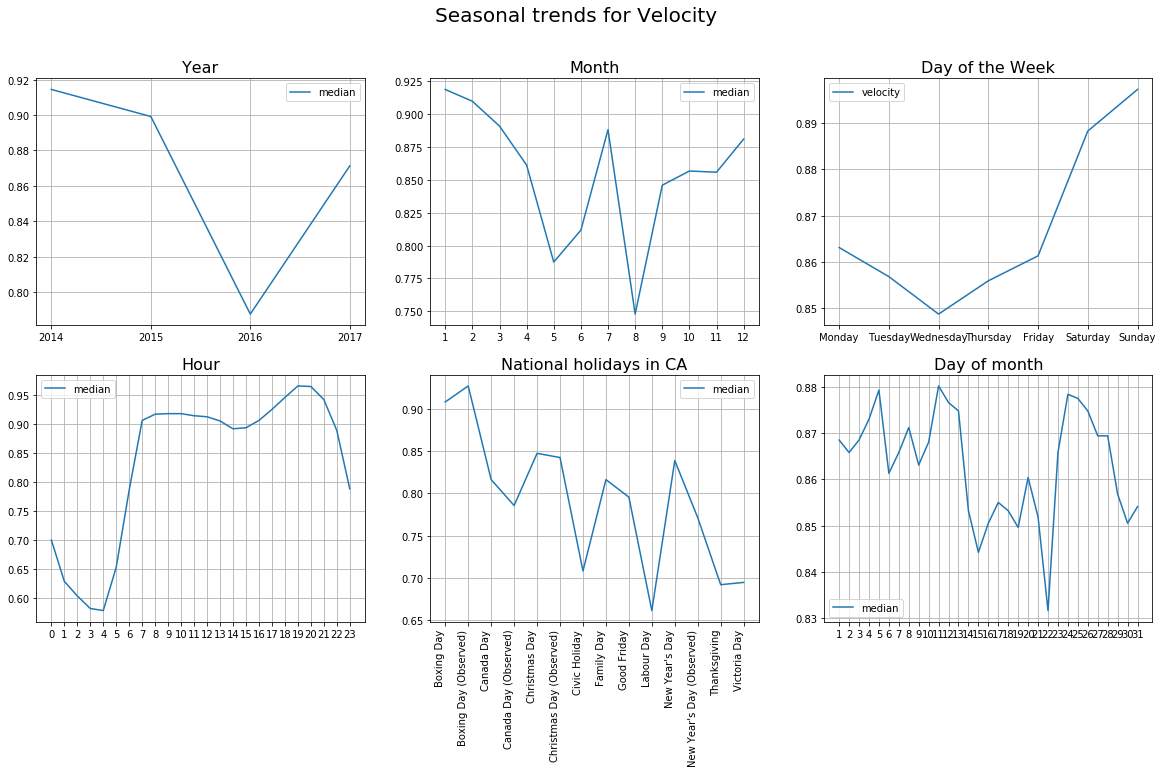

In [65]:
'''Plot seasonal trends for velocity'''


fig, axs = plt.subplots(figsize=(20,10),nrows=2, ncols=3)#, sharey=True)                                   
plt.suptitle("Seasonal trends for Velocity", fontsize=20)

velocity.velocity.groupby(velocity.year).median().rename('median').plot( legend=True,ax=axs[0][0])
axs[0][0].set_title("Year", fontsize=16, loc='center')
axs[0][0].set_xticks([2014,2015,2016,2017])

velocity.velocity.groupby(velocity.month).median().rename('median').plot(legend=True,ax=axs[0][1])
axs[0][1].set_title("Month", fontsize=16, loc='center')
axs[0][1].set_xticks(np.arange(start=1, stop=13, step=1))


velocity.velocity.groupby(velocity.wday, sort = False).median().plot(legend=True,ax=axs[0][2])
axs[0][2].set_title("Day of the Week", fontsize=16, loc='center')

velocity.velocity.groupby(velocity.hour).median().rename('median').plot(legend=True, ax=axs[1][0])
axs[1][0].set_title("Hour", fontsize=16, loc='center')
axs[1][0].set_xticks(np.arange(start=0, stop=24, step=1))

velocity.velocity.groupby(velocity.holidays).median().rename('median').plot(legend=True, ax=axs[1][1])
axs[1][1].set_title("National holidays in CA", fontsize=16, loc='center')
axs[1][1].set_xticks(np.arange(14))
axs[1][1].set_xticklabels(list(velocity.velocity.groupby(velocity.holidays).median().rename('median').index), 
                          rotation = 90, ha="right")

velocity.velocity.groupby(velocity.day).median().rename('median').plot(legend=True, ax=axs[1][2])
axs[1][2].set_title("Day of month", fontsize=16, loc='center')
axs[1][2].set_xticks(np.arange(start=1, stop=32, step=1))

for ax in axs.flat:
    ax.set(ylabel='', xlabel="")
    ax.grid(which='major')
    #ax.xaxis.grid()
    ax.legend(loc="best");

**Conclusions:**<a name="step3"></a>

- The data collected for the period from 2014-09-01 to 2017-12-31, and recorded regilary each 5 min.

- There 0.03% of the missing values in the 'velocity', and 6% of missing data in 'final_velocity'. I would use 'velocity' for anomaly detection and prediction. I left missing data, as some models accept data with missing values.

- The 'velocity' values are varying within wide limits, which are varying during the whole issued period, months, day of week, day of month, within national holidays and withing a day (24h). There are complex seasonal trends, which need to take into account with future modeling. Short description:
        
        -yearly: 2016 was the year with lowest velocity values
    
        -montly: there are some peaks, highest in january and July with 2 main descreases in May and August 
    
        -weekly: velocity is lowest am Wednesdays, and growing to Sundays  
    
        -hourly: the minimal values per day are registered at 4AM, then follow signal uprise and after 7AM its come to platoe. after 4PM its rising to 8PM and after that decreasing upt to its minimun at 4AM. This trend is exactly like this for level
    
        -national holidays in CA: there are higher or lower values for some holidays every year
        
        -the lowest values are registered in the midle of the each month
